In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn201

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [6]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.trn_dl))

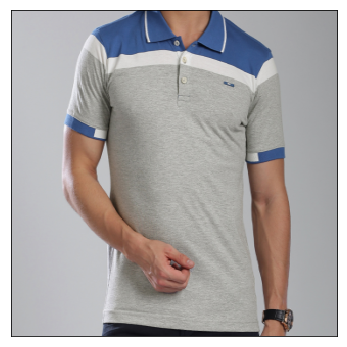

In [7]:
show_img(data.trn_ds.denorm(to_np(x))[1],figsize=(6,6))

In [8]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|████████  | 1368/1709 [00:16<00:04, 82.32it/s, loss=5.08]

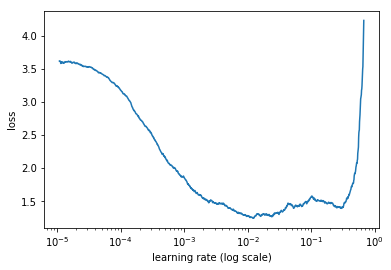

In [9]:
learn.sched.plot()

In [10]:
learn.fit(0.0005,20)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

  6%|▌         | 105/1709 [00:02<00:44, 36.41it/s, loss=2.45]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.210198   1.127648   0.685529  
    1      1.090541   1.057425   0.697065                     
    2      1.076015   1.00706    0.711011                      
    3      1.028936   0.98023    0.71488                       
    4      0.98213    0.961387   0.719626                      
    5      0.923299   0.944578   0.723715                       
    6      0.916997   0.93449    0.725029                      
    7      0.886332   0.924831   0.72795                       
    8      0.87713    0.918254   0.731162                      
    9      0.84116    0.91035    0.730286                       
    10     0.866941   0.907067   0.73401                        
    11     0.813679   0.899537   0.736273                      
    12     0.834794   0.895977   0.737296                      
    13     0.804333   0.892264   0.739121                       
    14     0.766718   0.883711   0.741165                 

[0.87726557, 0.74277161214953269]

In [11]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.684536   0.87093    0.743867  
    1      0.647472   0.874058   0.744305                      
    2      0.674394   0.868561   0.747664                      
    3      0.678831   0.870989   0.747518                      
    4      0.640425   0.875371   0.746933                      



[0.87537104, 0.74693341121495327]

In [12]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.585547   0.872908   0.747664  
    1      0.614575   0.867284   0.748102                      



[0.86728448, 0.74810163551401865]

In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[ 119    3    2    0    7   15   20   37   67    0    7    1   29    0    0   39    5    0   20    4    3
     1   75    0]
 [   3   54    0    0    0    1    1    0   19    0    1    0    4    0    0    2    0    0    0    4    0
     0   35    0]
 [   3    0   22    0    1    0    2    0    5    0    0    0    0    0    0    3    1    0    2    0    0
     0    6    0]
 [   2    0    0   25    0    0    0    5    0    0    0    0    0    0    0    9    0    0    5    0    0
     0    0    0]
 [   3    0    0    0  300    1    0    6    2    0    2    0    0    0    0  141    0    0   39    0    0
     0   19    0]
 [  14    0    1    0    1  123   12   27   31    0    8    0    1    0    0   14    1    0    1    3    0
     0   35    0]
 [  16    0    1    0    0   11  179    9   26    0    3    0    8    0    0   18    0    0    4    1    0
     1   30    0]
 [  20    0    2    5    6   20    7  218   14    0    0    0    2    1    0   

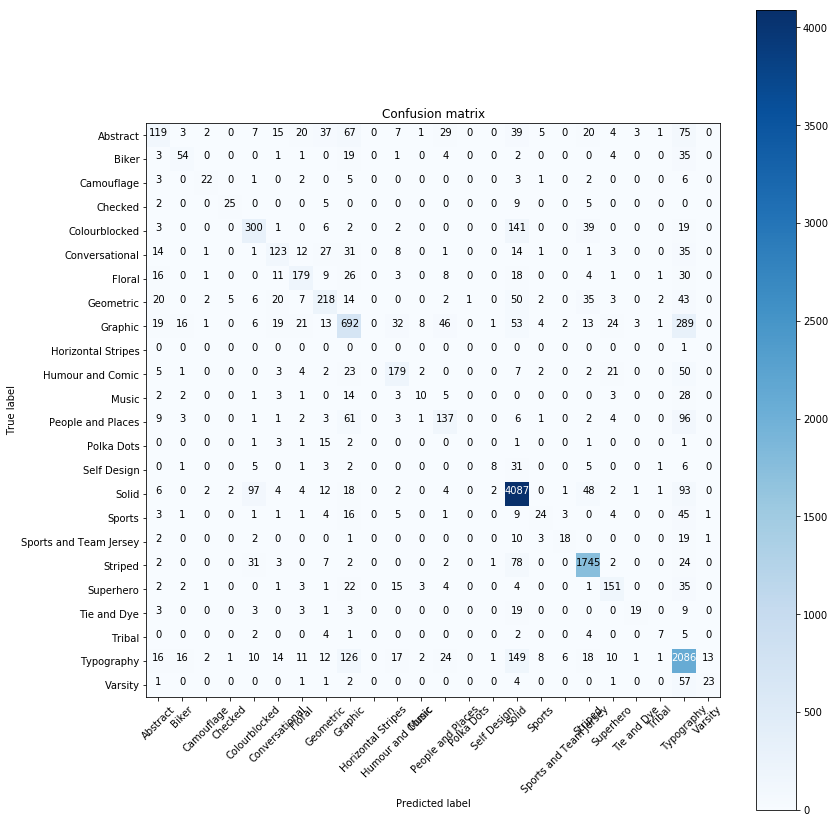

In [14]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.26211  0.00661  0.00441  0.       0.01542  0.03304  0.04405  0.0815   0.14758  0.       0.01542  0.0022
   0.06388  0.       0.       0.0859   0.01101  0.       0.04405  0.00881  0.00661  0.0022   0.1652   0.     ]
 [ 0.02419  0.43548  0.       0.       0.       0.00806  0.00806  0.       0.15323  0.       0.00806  0.
   0.03226  0.       0.       0.01613  0.       0.       0.       0.03226  0.       0.       0.28226  0.     ]
 [ 0.06667  0.       0.48889  0.       0.02222  0.       0.04444  0.       0.11111  0.       0.       0.       0.
   0.       0.       0.06667  0.02222  0.       0.04444  0.       0.       0.       0.13333  0.     ]
 [ 0.04348  0.       0.       0.54348  0.       0.       0.       0.1087   0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.1087   0.       0.       0.       0.       0.     ]
 [ 0.00585  0.       0.       0.       0.5848   0.00195  0.       0.0117   0.0039   0.       0.0039   0.

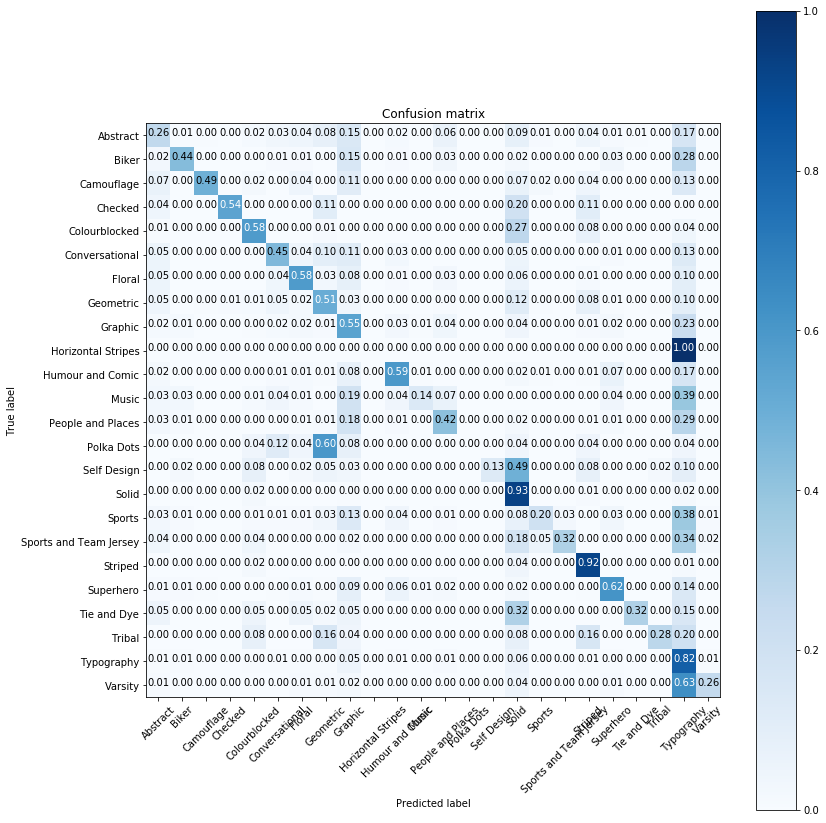

In [15]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [16]:
arch_201=dn201
sz=320

In [17]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [18]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [19]:
learn_no = ConvLearner.pretrained(arch_201,data,precompute=True,ps=0)

In [20]:
learn_no.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.995104   0.963264   0.714442  
    1      0.870294   0.926199   0.724445                      
    2      0.735915   0.928465   0.73014                       
    3      0.66148    0.93548    0.732988                      
    4      0.584389   1.001672   0.730286                      



[1.001672, 0.73028621495327106]

In [21]:
learn_no.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.339026   0.929677   0.749781  
    1      0.295765   0.939317   0.747518                      
    2      0.281015   0.947447   0.747518                      
    3      0.262813   0.954501   0.74854                       
    4      0.25497    0.969503   0.748175                      



[0.9695034, 0.74817464953271029]

In [22]:
learn_no.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.232535   0.96822    0.748467  
    1      0.213698   0.973556   0.749051                      



[0.97355622, 0.74905081775700932]

In [23]:
learn_no.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.214751   0.974782   0.74854   
    1      0.206381   0.97187    0.748394                       



[0.97187018, 0.74839369158878499]

In [24]:
learn_no.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.204095   0.980779   0.746422  
    1      0.188456   0.976073   0.748248                       



[0.97607321, 0.74824766355140182]

In [25]:
log_preds_no,y_no = learn_no.TTA()
probs_no = np.mean(np.exp(log_preds_no),0)
accuracy_np(probs_no, y_no)
y_no[10]=9
predictions_no = np.argmax(probs_no,axis=1)
cm_no = confusion_matrix(y_no, predictions_no)


Confusion matrix, without normalization
[[ 137    4    2    0    4   11   22   26   73    0   10    1   27    0    2   27    4    0   13    9    7
     3   72    0]
 [   5   60    1    0    0    1    2    0   19    0    0    1    4    0    0    1    0    0    0    0    0
     0   29    1]
 [   6    0   24    0    0    0    1    0    4    0    0    0    0    0    0    2    0    0    2    0    0
     0    6    0]
 [   1    0    0   26    0    0    0    5    1    0    0    0    0    0    0    8    0    0    4    0    0
     0    1    0]
 [   1    0    0    1  313    0    0    8    6    0    1    0    0    2    1  129    0    0   31    1    1
     0   18    0]
 [  14    0    1    0    3  128   10   23   23    0   11    0    4    0    0   11    1    0    2    2    0
     0   39    0]
 [  17    0    1    0    0   14  185    8   26    0    5    0    6    0    0   13    0    0    3    0    0
     0   28    1]
 [  28    0    2    4    5   24    5  204   21    0    1    0    2    1    2   58    

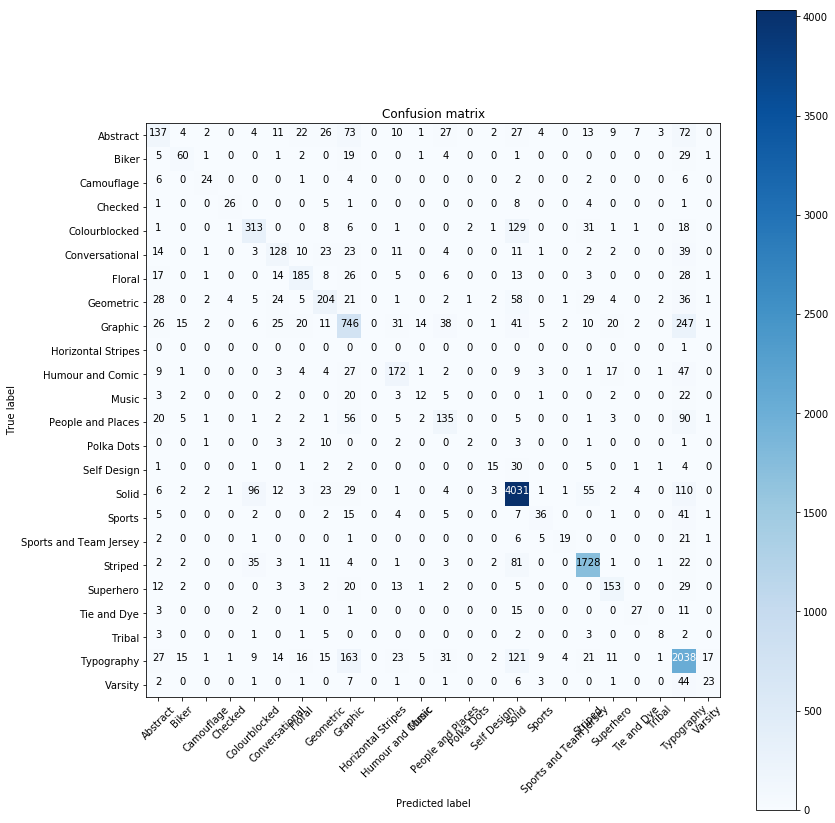

In [26]:
plot_confusion_matrix_mine(cm_no,data.classes,normalize=False)

In [27]:
probs_ensemble = probs_no + probs

In [28]:
probs_ensemble[:2]

array([[ 0.00015,  0.00001,  0.00007,  0.00002,  0.00005,  0.00046,  0.00141,  0.00941,  0.00025,  0.00005,
         0.00009,  0.00006,  0.00004,  0.00024,  0.00292,  1.98159,  0.00013,  0.     ,  0.00022,  0.00028,
         0.00009,  0.0001 ,  0.00227,  0.00009],
       [ 0.01594,  0.00014,  0.0002 ,  0.00011,  0.00431,  0.01429,  0.01351,  0.00198,  0.00674,  0.00079,
         0.007  ,  0.00097,  0.02655,  0.00117,  0.01078,  1.853  ,  0.00027,  0.00003,  0.00856,  0.00369,
         0.00513,  0.00033,  0.02343,  0.00109]], dtype=float32)

In [29]:
probs_ensemble = probs_ensemble/2

In [30]:
probs_ensemble[:2]

array([[ 0.00008,  0.     ,  0.00003,  0.00001,  0.00002,  0.00023,  0.0007 ,  0.00471,  0.00012,  0.00003,
         0.00004,  0.00003,  0.00002,  0.00012,  0.00146,  0.9908 ,  0.00007,  0.     ,  0.00011,  0.00014,
         0.00004,  0.00005,  0.00113,  0.00004],
       [ 0.00797,  0.00007,  0.0001 ,  0.00005,  0.00215,  0.00714,  0.00676,  0.00099,  0.00337,  0.0004 ,
         0.0035 ,  0.00048,  0.01327,  0.00059,  0.00539,  0.9265 ,  0.00013,  0.00001,  0.00428,  0.00184,
         0.00257,  0.00017,  0.01171,  0.00055]], dtype=float32)

In [31]:
accuracy_np(probs_ensemble, y_no)


0.75819432250512142

In [32]:
accuracy_np(probs,y_no)

0.74817091015510684

In [33]:
accuracy_np(probs_no,y_no)

0.74787825577992395

In [34]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [35]:
cm_ensemble = confusion_matrix(y, predictions_ensemble)


Confusion matrix, without normalization
[[ 131    3    2    0    4   11   20   35   71    0   11    0   25    0    2   36    4    0   18    6    3
     0   72    0]
 [   3   62    1    0    0    1    1    0   16    0    1    1    5    0    0    0    0    0    0    2    0
     0   30    1]
 [   6    0   23    0    0    0    1    0    3    0    0    0    0    0    0    2    1    0    2    0    0
     0    7    0]
 [   1    0    0   26    0    0    0    4    1    0    0    0    0    0    0    9    0    0    4    0    0
     0    1    0]
 [   1    0    0    1  312    1    0    5    4    0    1    0    0    0    1  135    0    0   32    1    1
     0   18    0]
 [  12    0    1    0    2  131    9   25   27    0    9    0    4    0    0   12    1    0    1    1    0
     0   37    0]
 [  15    0    1    0    0   11  193    6   24    0    4    0    7    0    0   14    0    0    3    0    0
     0   28    1]
 [  19    0    2    4    4   24    4  215   19    0    1    0    1    2    1   59    

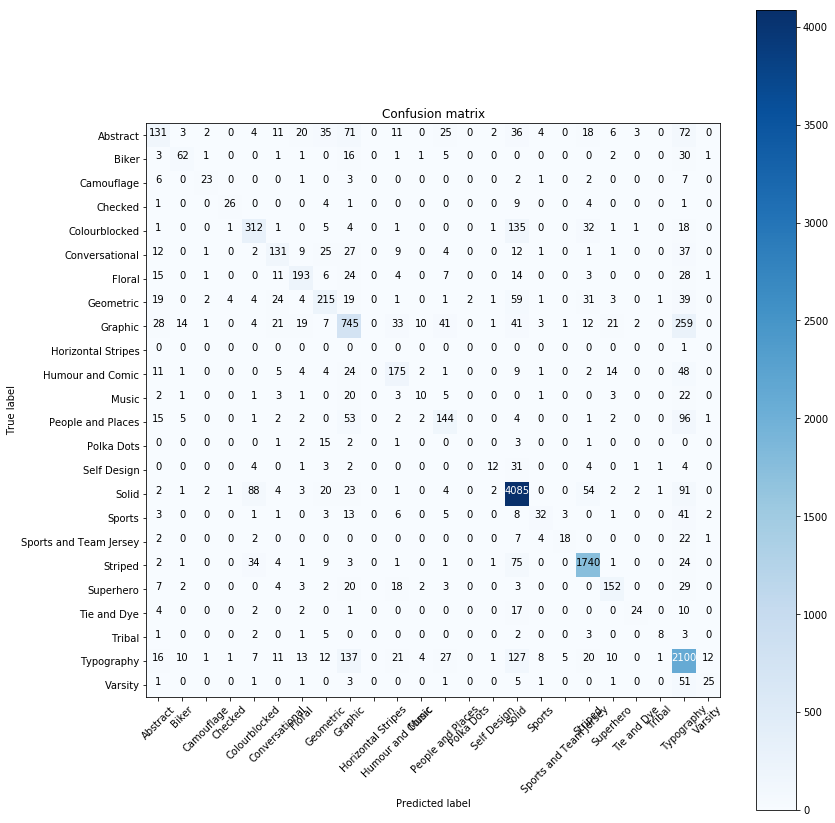

In [36]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.28855  0.00661  0.00441  0.       0.00881  0.02423  0.04405  0.07709  0.15639  0.       0.02423  0.
   0.05507  0.       0.00441  0.0793   0.00881  0.       0.03965  0.01322  0.00661  0.       0.15859  0.     ]
 [ 0.02419  0.5      0.00806  0.       0.       0.00806  0.00806  0.       0.12903  0.       0.00806  0.00806
   0.04032  0.       0.       0.       0.       0.       0.       0.01613  0.       0.       0.24194  0.00806]
 [ 0.13333  0.       0.51111  0.       0.       0.       0.02222  0.       0.06667  0.       0.       0.       0.
   0.       0.       0.04444  0.02222  0.       0.04444  0.       0.       0.       0.15556  0.     ]
 [ 0.02174  0.       0.       0.56522  0.       0.       0.       0.08696  0.02174  0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.08696  0.       0.       0.       0.02174  0.     ]
 [ 0.00195  0.       0.       0.00195  0.60819  0.00195  0.       0.00975  0.0078   0.       0.00195  0

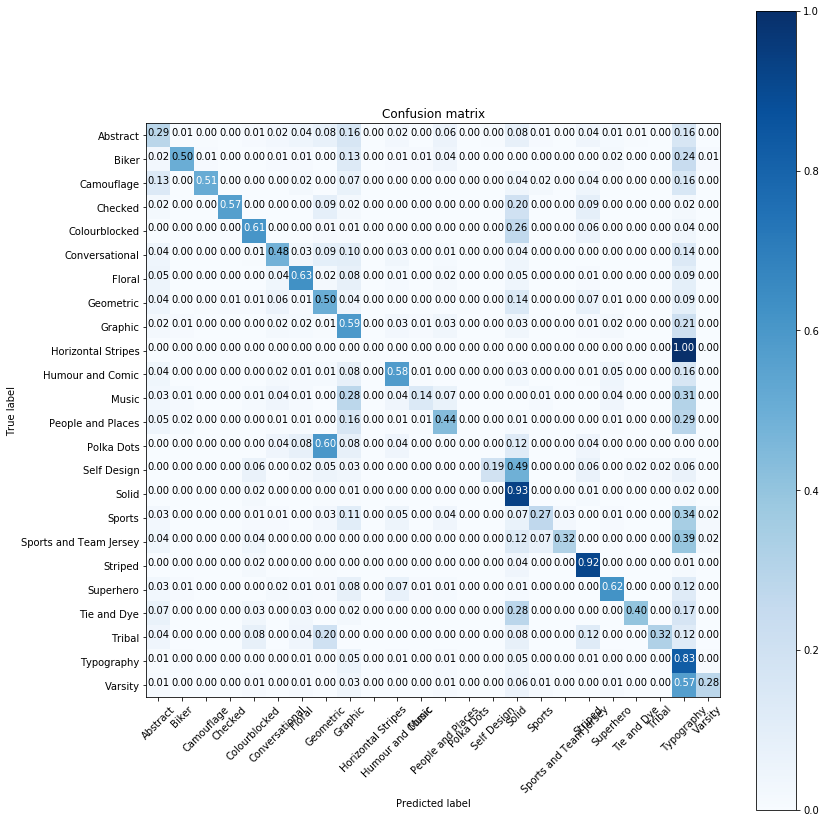

In [37]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [38]:
learn.unfreeze()

In [39]:
learn_no.unfreeze()

In [40]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [41]:
test = open_image(fname)
test= val_tfms((test))
test.shape

(3, 320, 320)

In [42]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

array([[ 0.00024,  0.00002,  0.00001,  0.00008,  0.01697,  0.00003,  0.00005,  0.0015 ,  0.00028,  0.00001,
         0.0001 ,  0.00004,  0.00027,  0.00016,  0.00141,  0.97124,  0.00037,  0.00002,  0.00012,  0.00004,
         0.00141,  0.00001,  0.00546,  0.00014]], dtype=float32)

In [43]:
data.classes[np.argmax(pred_temp[0,:])]

'Solid'

In [44]:
pred_temp_no = learn_no.predict_array(test[None])
pred_temp_no = np.exp(pred_temp_no)
pred_temp_no

array([[ 0.00002,  0.     ,  0.     ,  0.00006,  0.00112,  0.00001,  0.     ,  0.00008,  0.00006,  0.00001,
         0.00002,  0.     ,  0.00001,  0.00003,  0.00011,  0.99068,  0.00068,  0.     ,  0.00002,  0.     ,
         0.00004,  0.     ,  0.00704,  0.00002]], dtype=float32)

In [45]:
data.classes[np.argmax(pred_temp_no[0,:])]

'Solid'

In [46]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [47]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [48]:
df.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [49]:
ensemble_three =  probs + probs_no

In [50]:
ensemble_three[:3]

array([[ 0.00015,  0.00001,  0.00007,  0.00002,  0.00005,  0.00046,  0.00141,  0.00941,  0.00025,  0.00005,
         0.00009,  0.00006,  0.00004,  0.00024,  0.00292,  1.98159,  0.00013,  0.     ,  0.00022,  0.00028,
         0.00009,  0.0001 ,  0.00227,  0.00009],
       [ 0.01594,  0.00014,  0.0002 ,  0.00011,  0.00431,  0.01429,  0.01351,  0.00198,  0.00674,  0.00079,
         0.007  ,  0.00097,  0.02655,  0.00117,  0.01078,  1.853  ,  0.00027,  0.00003,  0.00856,  0.00369,
         0.00513,  0.00033,  0.02343,  0.00109],
       [ 0.00015,  0.00001,  0.00001,  0.     ,  0.00001,  0.00021,  0.00007,  0.00036,  0.00172,  0.00001,
         0.00011,  0.00001,  0.00045,  0.00002,  0.00022,  0.00838,  0.00028,  0.00001,  0.00002,  0.00005,
         0.00001,  0.00002,  1.98701,  0.00086]], dtype=float32)

In [51]:
ensemble_three= ensemble_three/3

In [52]:
accuracy_np(ensemble_three,y)

0.75819432250512142

In [53]:
predictions_ensemble_three = np.argmax(ensemble_three,axis=1)

In [54]:
predictions_ensemble

array([15, 15, 22, ..., 15, 15, 15])

In [55]:
cm = confusion_matrix(y, predictions_ensemble)

Normalized confusion matrix
[[ 0.28855  0.00661  0.00441  0.       0.00881  0.02423  0.04405  0.07709  0.15639  0.       0.02423  0.
   0.05507  0.       0.00441  0.0793   0.00881  0.       0.03965  0.01322  0.00661  0.       0.15859  0.     ]
 [ 0.02419  0.5      0.00806  0.       0.       0.00806  0.00806  0.       0.12903  0.       0.00806  0.00806
   0.04032  0.       0.       0.       0.       0.       0.       0.01613  0.       0.       0.24194  0.00806]
 [ 0.13333  0.       0.51111  0.       0.       0.       0.02222  0.       0.06667  0.       0.       0.       0.
   0.       0.       0.04444  0.02222  0.       0.04444  0.       0.       0.       0.15556  0.     ]
 [ 0.02174  0.       0.       0.56522  0.       0.       0.       0.08696  0.02174  0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.08696  0.       0.       0.       0.02174  0.     ]
 [ 0.00195  0.       0.       0.00195  0.60819  0.00195  0.       0.00975  0.0078   0.       0.00195  0

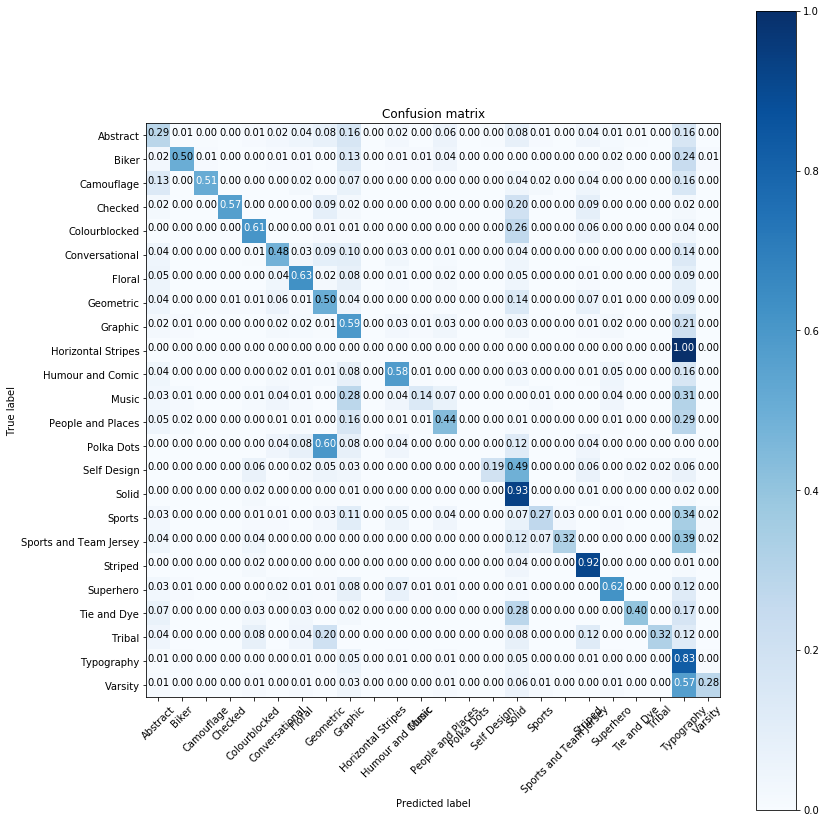

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [ ]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_three = learn_resnext.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two+pred_three)/3
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'

http://myntra.myntassets.com/assets/images/1826843/2017/3/28/11490680940727-Allen-Solly-Men-Red-Solid-Round-Neck-T-Shirt-2781490680940583-1.jpg
http://myntra.myntassets.com/assets/images/1091134/2016/9/30/11475223023888-Celio-Men-Yellow-Solid-V-Neck-T-Shirt-8221475223023601-1.jpg
http://myntra.myntassets.com/assets/images/1595913/2016/11/29/11480419683787-CULT-FICTION-Men-Rust-Solid-Round-Neck-T-Shirt-3791480419683584-1.jpg
http://myntra.myntassets.com/assets/images/1850515/2017/4/26/11493204669821-Antigravity-Women-Blue-Printed-Round-Neck-T-shirt-4231493204669569-1.jpg
http://myntra.myntassets.com/assets/images/1000841/2016/7/11/11468221198445-Being-Human-Clothing-Charcoal-Grey-Printed-T-shirt-5021468221198219-1.jpg
http://myntra.myntassets.com/assets/images/1615980/2017/2/10/11486709107632-Adamo-London-Men-Red-Checked-Round-Neck-T-Shirt-9691486709107400-1.jpg
http://myntra.myntassets.com/assets/images/2060787/2017/9/27/11506492705409-Aeropostale-Women-Tshirts-9531506492705254-1.jpg
h

http://myntra.myntassets.com/assets/images/diy/2017/11/30/4b0d8671-2b77-4d3e-b570-d38c1cc77c86default.jpg
http://myntra.myntassets.com/assets/images/1252904/2016/5/20/11463736161586-612-league-Boys-Tshirts-5891463736161466-1.jpg
http://myntra.myntassets.com/assets/images/1759866/2017/2/28/11488272992172-Adidas-Men-White-Solid-Round-Neck-T-Shirt-8411488272992098-1.jpg
http://myntra.myntassets.com/assets/images/1070037/2015/12/1/11448954276235-Adidas-Maroon-INT-Replica-2-Cavaliers-Printed-Jersey-9721448954275722-1.jpg
http://myntra.myntassets.com/images/style/properties/Campus-Sutra-Men-White-Printed-T-shirt_0d0a27f2d26aad2e72a741c41c9cc8b5_images.jpg
http://myntra.myntassets.com/assets/images/2171592/2017/10/12/11507797313139-Bamboo-Tribe-Men-Black--Cream-Coloured-Colourblocked-Round-Neck-T-shirt-3051507797312948-1.jpg
http://myntra.myntassets.com/assets/images/1768132/2017/3/6/11488795014457-Celio-Men-Cream-Solid-Round-Neck-T-Shirt-4621488795014176-1.jpg
http://myntra.myntassets.com/as

http://myntra.myntassets.com/assets/images/2035447/2017/9/1/11504265703418-Bossini-Men-White-Printed-Round-Neck-T-shirt-1801504265703243-1.jpg
http://myntra.myntassets.com/assets/images/2029329/2017/8/4/11501829944946-Duke-Boys-Tshirts-591501829944832-1.jpg
http://myntra.myntassets.com/assets/images/1576832/2016/10/5/11475650443393-ARISE-Men-Tshirts-7941475650443456-1.jpg
http://myntra.myntassets.com/assets/images/1077464/2015/11/17/11447755156669-Basics-Men-Tshirts-4971447755156247-1.jpg
http://myntra.myntassets.com/assets/images/1706947/2016/12/29/11483004087058-Adidas-Men-Blue-Solid-Polo-Collar-T-Shirt-551483004086850-1.jpg
http://myntra.myntassets.com/assets/images/1703350/2016/12/27/11482840779801-Adidas-Men-Tshirts-5881482840779637-1.jpg
http://myntra.myntassets.com/assets/images/1549525/2016/10/5/11475657299246-Converse-Men-Lime-Green-Printed-Round-Neck-T-Shirt-4451475657299160-1.jpg
http://myntra.myntassets.com/assets/images/1500893/2016/9/14/11473835997700-BLEND-Men-Black-Stri

In [ ]:
df.to_csv('myntra-ensemble-three.csv',index=False)